## London Transport Network

In [ ]:
# The aim of the following is to explore some elements of Graph Theory using the Python library Networkx. The network
# being explored is the London transport system, which includes the Underground, Overground and the DLR.

![](tube_map.gif)

In [1]:
# Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
plt.style.use('ggplot') 
%matplotlib inline

#### Load data

In [2]:
# Transport systems
df_layers = pd.read_csv('./Dataset/london_transport_layers.txt',sep='\t')

# Seperate layer information into dataframe
df_layers['layerID'] = [int(x[0]) for x in list(df_layers.iloc[:,0])]
df_layers['layerLabel'] = [x[2:] for x in list(df_layers.iloc[:,0])]
df_layers.drop(df_layers.columns[0],axis=1,inplace=True)
df_layers.head()

,layerID,layerLabel
0,1,Tube (All underground lines aggregated)
1,2,Overground
2,3,DLR


In [3]:
# Stations information

df_multiplex = pd.read_csv('./Dataset/london_transport_multiplex.edges',sep=' ',header=None)
df_multiplex.columns = ['layer','node_1','node_2','weight']
df_multiplex.head()

,layer,node_1,node_2,weight
0,1,1,77,2
1,1,1,106,1
2,1,1,219,1
3,1,1,321,2
4,1,3,224,1


In [4]:
# Station location information

df_nodes = pd.read_csv('./Dataset/london_transport_nodes.txt',sep=' ')
df_nodes.head()

,nodeID,nodeLabel,nodeLat,nodeLong
0,0,abbeyroad,51.531952,0.003738
1,1,westham,51.528526,0.005332
2,2,actoncentral,51.508758,-0.263416
3,3,willesdenjunction,51.532234,-0.243895
4,4,actontown,51.503071,-0.280288


In [16]:
# Station line information

df_lines = pd.read_csv('./Dataset/london_transport_raw.edges',sep=' ',header=None)
df_lines.columns = ['line','station_1','station_2']
df_lines.head()

,line,station_1,station_2
0,bakerloo,harrow&wealdstone,kenton
1,bakerloo,kenton,southkenton
2,bakerloo,southkenton,northwembley
3,bakerloo,northwembley,wembleycentral
4,bakerloo,wembleycentral,stonebridgepark


In [5]:
# Define location dictionary for station position

position_dict = {}

for index, row in df_nodes.iterrows():
    position_dict[row['nodeID']] = [row['nodeLat'], row['nodeLong'] ]

#### London Underground network

In [100]:
underground = df_multiplex[df_multiplex.layer == 1].loc[:,'node_1':]
nodes = np.unique(underground[['node_1', 'node_2']])

# Generate an empty graph
G_underground = nx.Graph()

# Add nodes to graph
for i in nodes:
    G_underground.add_node(i)


# Link nodes together with edges
for i,j in zip(underground['node_1'], underground['node_2'] ):
    G_underground.add_edge(i,j)

Name: 
Type: Graph
Number of nodes: 271
Number of edges: 312
Average degree:   2.3026


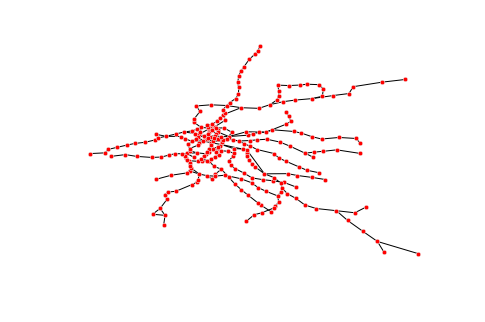

In [32]:
# Plot map
nx.draw(G_underground, node_size=20, edge_cmap=cm.get_cmap('rainbow'), pos = position_dict)
print nx.info(G_underground)

In [ ]:
# The degree of a node is defined to be the number of links that node has

#### London Overground network

In [107]:
overground = df_multiplex[df_multiplex.layer == 2].loc[:,'node_1':]
nodes = np.unique(overground[['node_1', 'node_2']])

# Generate an empty graph
G_overground = nx.Graph()

# Add nodes to graph
for i in nodes:
    G_overground.add_node(i)

# Link nodes together with edges
for i,j in zip(overground['node_1'], overground['node_2'] ):
    G_overground.add_edge(i,j)

Name: 
Type: Graph
Number of nodes: 83
Number of edges: 83
Average degree:   2.0000


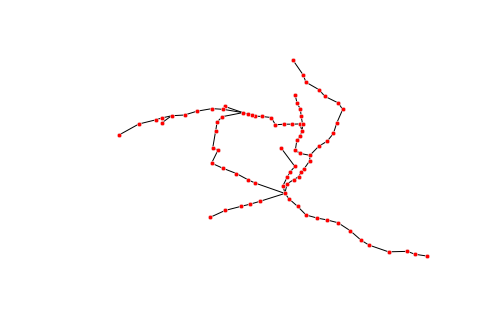

In [9]:
# Plot map
nx.draw(G_overground, node_size=20, edge_cmap=cm.get_cmap('rainbow'), pos = position_dict)
print nx.info(G_overground)

#### London DLR network

In [105]:
dlr = df_multiplex[df_multiplex.layer == 3].loc[:,'node_1':]
nodes = np.unique(dlr[['node_1', 'node_2']])

# Generate an empty graph
G_dlr = nx.Graph()

# Add nodes to graph
for i in nodes:
    G_dlr.add_node(i)

# Link nodes together with edges
for i,j in zip(dlr['node_1'], dlr['node_2'] ):
    G_dlr.add_edge(i,j)

Name: 
Type: Graph
Number of nodes: 45
Number of edges: 46
Average degree:   2.0444


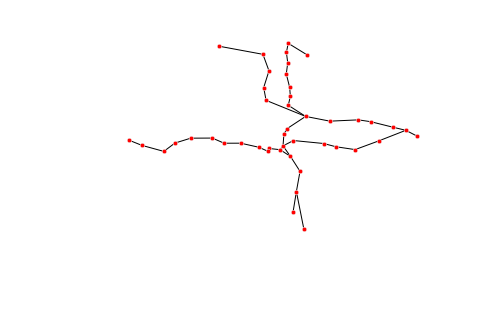

In [11]:
# Plot map
nx.draw(G_dlr, node_size=20, edge_cmap=cm.get_cmap('rainbow'), pos = position_dict)
print nx.info(G_dlr)

#### Full transport network

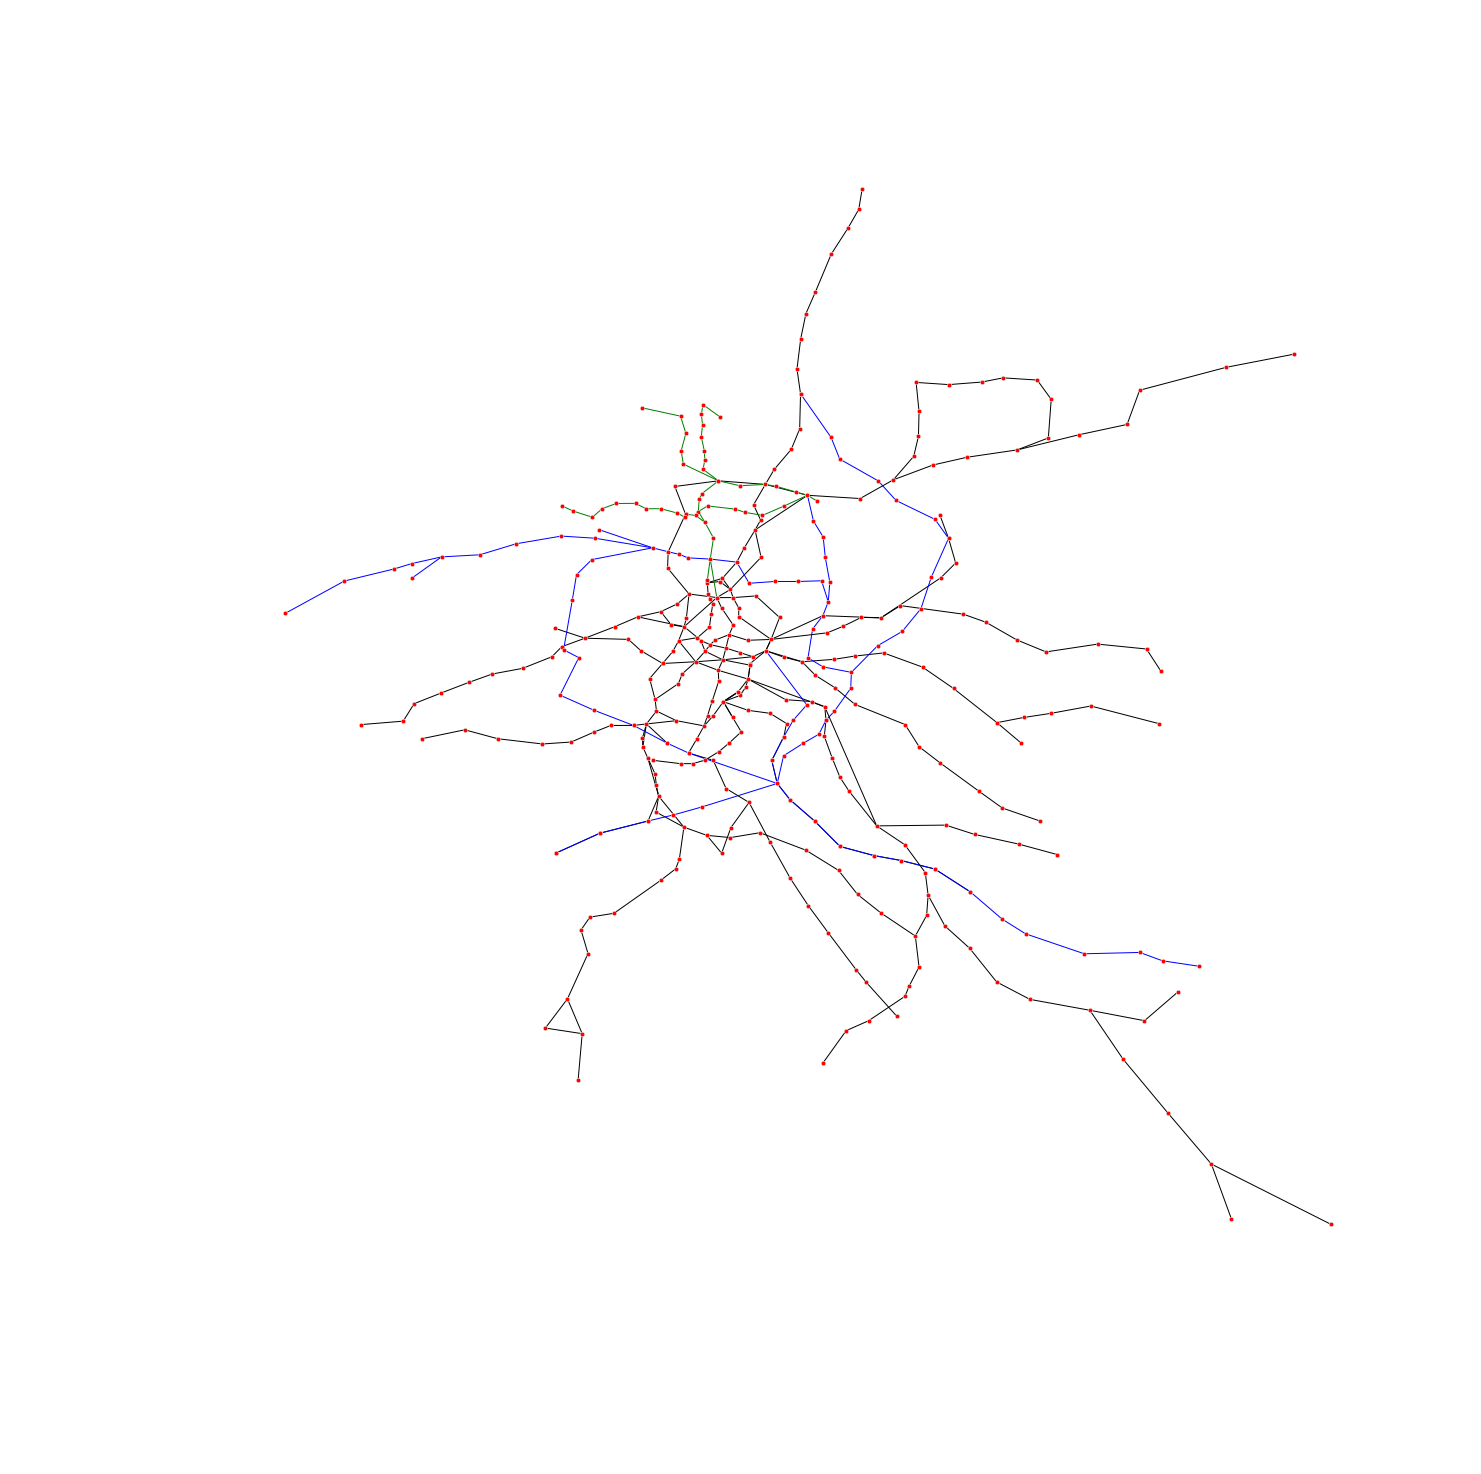

In [12]:
# Full transport map

plt.figure(figsize = (20, 20))
nx.draw(G_underground, node_size=20, edge_color='k', pos = position_dict)
nx.draw(G_overground, node_size=20, edge_color='blue', pos = position_dict)
nx.draw(G_dlr, node_size=20, edge_color='green', pos = position_dict)

In [13]:
# Full transport network graph

full = df_multiplex.loc[:,'node_1':]
nodes = np.unique(full[['node_1', 'node_2']])

# Generate an empty graph
G_full = nx.Graph()

# Add nodes to graph
for i in nodes:
    G_full.add_node(i)

# Link nodes together with edges
for i,j in zip(full['node_1'], full['node_2'] ):
    G_full.add_edge(i,j)

print nx.info(G_full)

Name: 
Type: Graph
Number of nodes: 369
Number of edges: 430
Average degree:   2.3306


#### Network diameter

In [14]:
# The diameter of a graph is the maximum eccentricity of any vertex in the graph. That is, it is the greatest 
# distance between any pair of vertices. To find the diameter of a graph, we first find the shortest path between 
# each pair of vertices. The greatest length of any of these paths is then the diameter of the graph.

# Find only connected subgraphs with more than one vertex
G_underground_connected = [G for G in nx.connected_component_subgraphs(G_underground) if G.number_of_nodes()>1][0]
G_overground_connected = [G for G in nx.connected_component_subgraphs(G_overground) if G.number_of_nodes()>1][0]
G_dlr_connected = [G for G in nx.connected_component_subgraphs(G_dlr) if G.number_of_nodes()>1][0]
G_full_connected = [G for G in nx.connected_component_subgraphs(G_full) if G.number_of_nodes()>1][0] 

print 'Underground Diameter: ', nx.diameter(G_underground_connected)
print 'Overground Diameter: ', nx.diameter(G_overground_connected)
print 'DLR Diameter: ', nx.diameter(G_dlr_connected)
print 'Full Network: ', nx.diameter(G_full_connected)

Underground Diameter:  39
Overground Diameter:  35
DLR Diameter:  23
Full Network:  39


#### Shortest path between stations

In [19]:
# Function which finds the shortest path between locations, returning stations crossed, path length and lines
# which need to be taken.

def your_shortest_path(G, start_station, end_station):

    start_node = int(df_nodes.nodeID[df_nodes.nodeLabel == start_station]) # Get node number from station name
    end_node = int(df_nodes.nodeID[df_nodes.nodeLabel == end_station])
    pathlength = nx.shortest_path_length(G, start_node, end_node) # Length of shortest path between nodes
    path = nx.shortest_path(G, start_node, end_node) # Path taken between nodes
    stations_crossed = list(df_nodes.nodeLabel[path]) # Get station names from nodes in path
    lines_taken = []
    # Appends lines which need taking from path information
    for i in range(len(stations_crossed)-1):

        connection = list((df_lines.line[(df_lines.station_1 == stations_crossed[i]) & 
                                         (df_lines.station_2 == stations_crossed[i + 1]) |
                                         (df_lines.station_1 == stations_crossed[i + 1]) & 
                                         (df_lines.station_2 == stations_crossed[i])]))[0]
        lines_taken.append(connection)
            
    indexes = np.unique(lines_taken, return_index = True)[1] # Returns only the unique lines
    
    print 'The shortest path from {} to {} crosses'.format(start_station, end_station)
    print 'the following stations: ', stations_crossed
    print 'The path length is: ', pathlength
    print 'You will need to take the following lines: ', [lines_taken[index] for index in sorted(indexes)]

In [20]:
# Travel information from Waterloo to Stratford

your_shortest_path(G_underground,'waterloo','stratford')

The shortest path from waterloo to stratford crosses
the following stations:  ['waterloo', 'bank', 'liverpoolstreet', 'bethnalgreen', 'mileend', 'stratford']
The path length is:  5
You will need to take the following lines:  ['waterloo&city', 'central']


#### PageRank of nodes

In [40]:
# PageRank is an algorithm developed by Google founders to rank a websites importance based on the quantity and
# quality of links to that website. As a centrality measure, the algorithm can be applied to networks to obtain 
# a ranking of the nodes

pagerank_underground = nx.pagerank(G_underground).values()
pagerank_overground = nx.pagerank(G_overground).values()
pagerank_dlr = nx.pagerank(G_dlr).values()

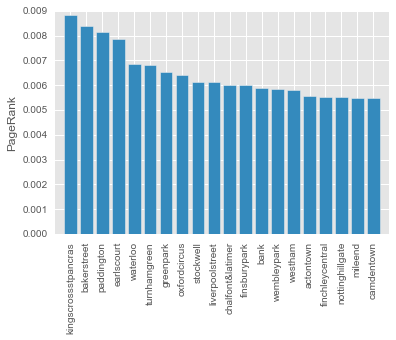

In [62]:
# Underground

nodes = np.unique(underground[['node_1', 'node_2']])
node_names = np.array([df_nodes.nodeLabel[i] for i in nodes])
indices = np.argsort(pagerank_underground)[::-1] # sort importance in descending order

plt.bar(range(len(indices[:20])), np.array(pagerank_underground)[indices][:20], align="center")
plt.ylabel('PageRank')
plt.xticks(range(len(indices[:20])), node_names[indices], rotation=90)
plt.xlim([-1, len(indices[:20])])
plt.show()

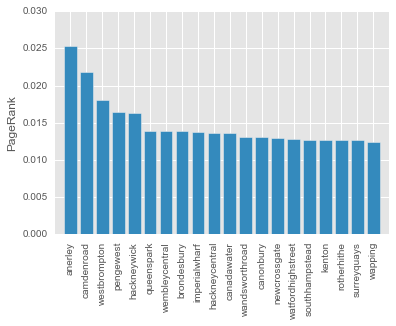

In [63]:
# Overground

nodes = np.unique(overground[['node_1', 'node_2']])
node_names = np.array([df_nodes.nodeLabel[i] for i in nodes])
indices = np.argsort(pagerank_overground)[::-1] # sort importance in descending order

plt.bar(range(len(indices[:20])), np.array(pagerank_overground)[indices][:20], align="center")
plt.ylabel('PageRank')
plt.xticks(range(len(indices[:20])), node_names[indices], rotation=90)
plt.xlim([-1, len(indices[:20])])
plt.show()

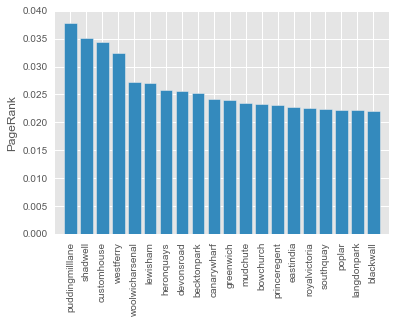

In [64]:
# DLR

nodes = np.unique(dlr[['node_1', 'node_2']])
node_names = np.array([df_nodes.nodeLabel[i] for i in nodes])
indices = np.argsort(pagerank_dlr)[::-1] # sort importance in descending order

plt.bar(range(len(indices[:20])), np.array(pagerank_dlr)[indices][:20], align="center")
plt.ylabel('PageRank')
plt.xticks(range(len(indices[:20])), node_names[indices], rotation=90)
plt.xlim([-1, len(indices[:20])])
plt.show()

#### Betweenness of nodes

In [66]:
# Betweeness is a measure centrality in a graph based on the shortest path. Indicators of centrality identify the
# most important vertices within a graph. Between each pair of vertices in a graph there exists a shortest path
# between them, such that the number of edges that the path passes through is minimised. Betweeness for each vertex
# is the number of these shortest paths that pass through the vertex.

betweeness_underground = nx.betweenness_centrality(G_underground).values()
betweeness_overground = nx.betweenness_centrality(G_overground).values()
betweeness_dlr = nx.betweenness_centrality(G_dlr).values()

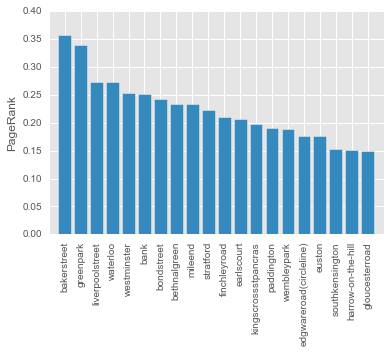

In [68]:
# Underground

nodes = np.unique(underground[['node_1', 'node_2']])
node_names = np.array([df_nodes.nodeLabel[i] for i in nodes])
indices = np.argsort(betweeness_underground)[::-1] # sort importance in descending order

plt.bar(range(len(indices[:20])), np.array(betweeness_underground)[indices][:20], align="center")
plt.ylabel('Betweeness')
plt.xticks(range(len(indices[:20])), node_names[indices], rotation=90)
plt.xlim([-1, len(indices[:20])])
plt.show()

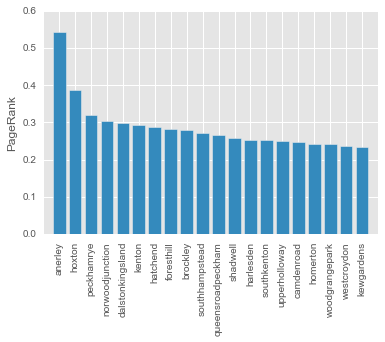

In [69]:
# Overground

nodes = np.unique(overground[['node_1', 'node_2']])
node_names = np.array([df_nodes.nodeLabel[i] for i in nodes])
indices = np.argsort(betweeness_overground)[::-1] # sort importance in descending order

plt.bar(range(len(indices[:20])), np.array(betweeness_overground)[indices][:20], align="center")
plt.ylabel('Betweeness')
plt.xticks(range(len(indices[:20])), node_names[indices], rotation=90)
plt.xlim([-1, len(indices[:20])])
plt.show()

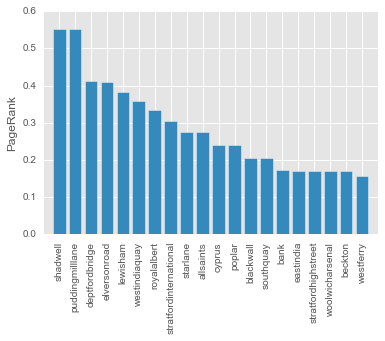

In [70]:
# DLR

nodes = np.unique(dlr[['node_1', 'node_2']])
node_names = np.array([df_nodes.nodeLabel[i] for i in nodes])
indices = np.argsort(betweeness_dlr)[::-1] # sort importance in descending order

plt.bar(range(len(indices[:20])), np.array(betweeness_dlr)[indices][:20], align="center")
plt.ylabel('Betweeness')
plt.xticks(range(len(indices[:20])), node_names[indices], rotation=90)
plt.xlim([-1, len(indices[:20])])
plt.show()

#### Network disruption

In [80]:
# Adding in disruption data

list_disruptions = !ls ./Dataset/Disruptions/
df_disruptions = pd.read_table('./Dataset/Disruptions/'+ list_disruptions[1], sep=' ',header=None)
df_disruptions.columns = ['layer','node_1','node_2','weight']
df_disruptions.head()

,layer,node_1,node_2,weight
0,1,1,106,1
1,1,1,219,1
2,1,1,321,2
3,1,1,77,2
4,1,3,224,1


In [101]:
# Underground

dis_underground = df_disruptions[df_disruptions.layer==1].loc[:,'node_1':].as_matrix()
nodes = np.unique(underground[['node_1', 'node_2']])

G_dis_underground = nx.Graph()

# Add nodes to graph
for i in nodes:
    G_dis_underground.add_node(i)
    
G_dis_underground.add_weighted_edges_from(dis_underground)
print nx.info(G_underground)
print nx.info(G_dis_underground)

Name: 
Type: Graph
Number of nodes: 271
Number of edges: 312
Average degree:   2.3026
Name: 
Type: Graph
Number of nodes: 271
Number of edges: 312
Average degree:   2.3026


In [104]:
# Overground

dis_overground = df_disruptions[df_disruptions.layer==2].loc[:,'node_1':].as_matrix()
nodes = np.unique(overground[['node_1', 'node_2']])

G_dis_overground = nx.Graph()

# Add nodes to graph
for i in nodes:
    G_dis_overground.add_node(i)
    
G_dis_overground.add_weighted_edges_from(dis_overground)
print nx.info(G_overground)
print nx.info(G_dis_overground)

Name: 
Type: Graph
Number of nodes: 83
Number of edges: 83
Average degree:   2.0000
Name: 
Type: Graph
Number of nodes: 83
Number of edges: 70
Average degree:   1.6867


In [106]:
# DLR

dis_dlr = df_disruptions[df_disruptions.layer==3].loc[:,'node_1':].as_matrix()
nodes = np.unique(dlr[['node_1', 'node_2']])

G_dis_dlr = nx.Graph()

# Add nodes to graph
for i in nodes:
    G_dis_dlr.add_node(i)
    
G_dis_dlr.add_weighted_edges_from(dis_dlr)
print nx.info(G_dlr)
print nx.info(G_dis_dlr)

Name: 
Type: Graph
Number of nodes: 45
Number of edges: 46
Average degree:   2.0444
Name: 
Type: Graph
Number of nodes: 45
Number of edges: 46
Average degree:   2.0444


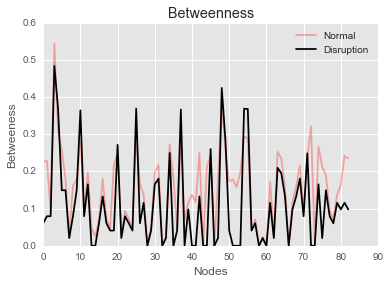

In [112]:
# Betweeness comparison for Overground

plt.plot(range(nx.number_of_nodes(G_overground)),nx.betweenness_centrality(G_overground).values(),color='r', alpha = 0.3)
plt.plot(range(nx.number_of_nodes(G_dis_overground)),nx.betweenness_centrality(G_dis_overground).values(), color = 'k')
plt.legend(['Normal','Disruption'])
plt.title('Betweenness')
plt.xlabel('Nodes')
plt.ylabel('Betweeness')
plt.show()

In [ ]:
# In general, with the disruptions added into the network, node's betweeness falls

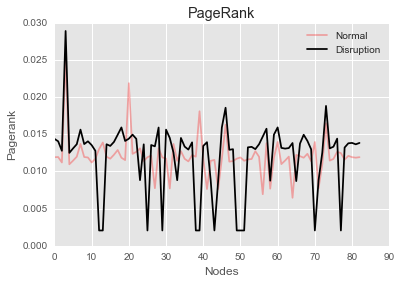

In [114]:
# Pagerank comparison for Overground

plt.plot(range(nx.number_of_nodes(G_overground)),nx.pagerank(G_overground).values(),color='r', alpha = 0.3)
plt.plot(range(nx.number_of_nodes(G_dis_overground)),nx.pagerank(G_dis_overground).values(), color = 'k')
plt.legend(['Normal','Disruption'])
plt.title('PageRank')
plt.xlabel('Nodes')
plt.ylabel('Pagerank')
plt.show()

In [ ]:
# In general, with the disruptions added into the network, node's PageRank falls